In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #for plotting

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz #plot tree
from sklearn.metrics import roc_curve, auc #for model evaluation
from sklearn.metrics import classification_report #for model evaluation
from sklearn.metrics import confusion_matrix #for model evaluation
from sklearn.model_selection import train_test_split #for data splitting
import eli5 #for purmutation importance
from eli5.sklearn import PermutationImportance


from warnings import simplefilter  # import warnings filter
simplefilter(action='ignore', category=FutureWarning)  # ignore all future warnings
np.random.seed(123) #ensure reproducibility

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


#### Column Description [Link](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data#data.csv)  
id: ID number  
diagnosis: The diagnosis of breast tissues (M = malignant, B = benign)  
radius_mean: mean of distances from center to points on the perimeter  
texture_mean: standard deviation of gray-scale values  
perimeter_mean: mean size of the core tumor  
area_mean  
smoothness_mean: mean of local variation in radius lengths  
compactness_mean: mean of perimeter^2 / area - 1.0  
concavity_mean: mean of severity of concave portions of the contour  
concave points_mean: mean for number of concave portions of the contour  
symmetry_mean  
fractal_dimension_mean: mean for "coastline approximation" - 1  
radius_se: standard error for the mean of distances from center to points on the perimeter  
texture_se: standard error for standard deviation of gray-scale values  
perimeter_se  
area_se  
smoothness_se: standard error for local variation in radius lengths  
compactness_se: standard error for perimeter^2 / area - 1.0  
concavity_se: standard error for severity of concave portions of the contour  
concave points_se: standard error for number of concave portions of the contour  
symmetry_se  
fractal_dimension_se: standard error for "coastline approximation" - 1  
radius_worst: "worst" or largest mean value for mean of distances from center to points on the perimeter  
texture_worst: "worst" or largest mean value for standard deviation of gray-scale values  
perimeter_worst  
area_worst  
smoothness_worst: "worst" or largest mean value for local variation in radius lengths  
compactness_worst: "worst" or largest mean value for perimeter^2 / area - 1.0  
concavity_worst: "worst" or largest mean value for severity of concave portions of the contour  
concave points_worst: "worst" or largest mean value for number of concave portions of the contour  
symmetry_worst  
fractal_dimension_worst: "worst" or largest mean value for "coastline approximation" - 1  

In [4]:
# rearrange columns; remove ID, columns of standard error and Unnamed: 32
fixed_columns = list(df.columns[2:-1])+[df.columns[1]]
fixed_columns = [c for c in fixed_columns if not c.endswith('_se')]
df_data = df[fixed_columns]
df_data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [5]:
# Convert (M=malignant, B=benign) to (1,0)
pd.options.mode.chained_assignment = None  #hide any pandas warnings
df_data.loc[df_data.index[df_data['diagnosis']=='B'],'diagnosis'] = 0
df_data.loc[df_data.index[df_data['diagnosis']=='M'],'diagnosis'] = 1

In [6]:
df_data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


### Split data into training and testing

In [7]:
feature_names = df_data.columns[:-1].tolist()
X = df_data[df_data.columns[:-1]].values
y = df_data['diagnosis'].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .2, random_state=10) #split the data

### 1. Logistic regression

In [8]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression().fit(X_train,y_train)
y_LR = LR.predict(X_test)

### 2. Decision tree

In [9]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier().fit(X_train,y_train)
y_DT = DT.predict(X_test)

### 3. Random forest

In [10]:
from sklearn.ensemble import RandomForestClassifier #for the model
RF = RandomForestClassifier().fit(X_train, y_train)
y_RF = RF.predict(X_test)

### Evaluation

In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

algorithms = ['Logistic Regression','Decision Tree','Random Forest']

y_preds = [y_LR,y_DT,y_RF]


# sensitivity and specificity
sensitivity,specificity  = [],[]
for y_pred in y_preds:
    cm = confusion_matrix(y_test,y_pred)
    sensitivity.append(cm[0,0]/(cm[0,0]+cm[1,0]))
    specificity.append(cm[1,1]/(cm[1,1]+cm[0,1]))

# accuracy
accuracy = []
for y_pred in y_preds:
    accuracy.append(accuracy_score(y_test, y_pred))

# F1-score
F1scores = []
for y_pred in y_preds:
    F1scores.append(f1_score(y_test, y_pred, pos_label=1))

# Create dataframe for output
df_eva = pd.DataFrame({"Sensitivity":sensitivity,
                       "Specificity":specificity,
                       "Accuracy":accuracy, 
                       "F1-score":F1scores}, index=algorithms)
df_eva.round(3)

,Sensitivity,Specificity,Accuracy,F1-score
Logistic Regression,0.973,0.902,0.947,0.925
Decision Tree,0.986,0.864,0.939,0.916
Random Forest,0.973,0.925,0.956,0.937


### k-fold cross validation

In [12]:
from sklearn.model_selection import KFold 

def cross_validatoin(fold, model, X, y):
    kf = KFold(n_splits=fold,shuffle=True) 
    scores = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index] 
        y_train, y_test = y[train_index], y[test_index]
        model.fit(X_train, y_train)
        scores.append(model.score(X_test,y_test))
    return scores

In [13]:
f = 5

# Logistic Regression
score_LR = cross_validatoin(f,LogisticRegression(), X, y)

# Decision Tree
score_DT = cross_validatoin(f,DecisionTreeClassifier(), X, y)

# Random Forest
score_RF = cross_validatoin(f,RandomForestClassifier(), X, y)

### Evaluate the impact of each feature with SHAP Values  
Link to [SHAP (SHapley Additive exPlanations)](https://www.kaggle.com/dansbecker/shap-values)

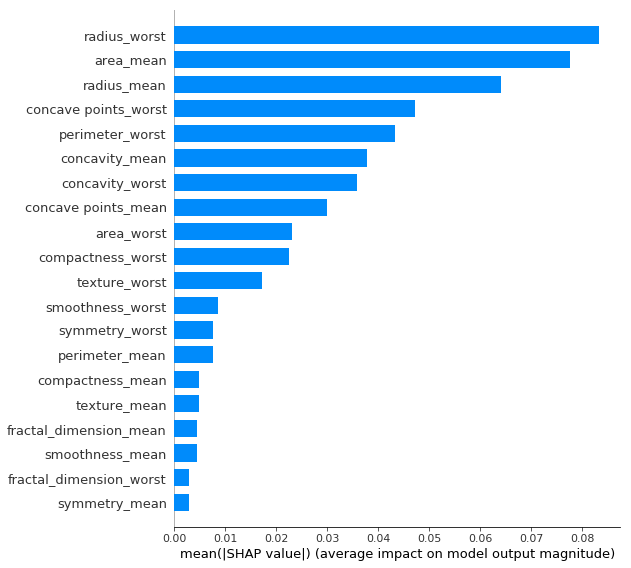

In [14]:
import shap
explainer = shap.TreeExplainer(RF) # Create object that can calculate shap values
shap_values = explainer.shap_values(X_test) 

shap.summary_plot(shap_values[1], X_test,feature_names=feature_names,plot_type="bar")

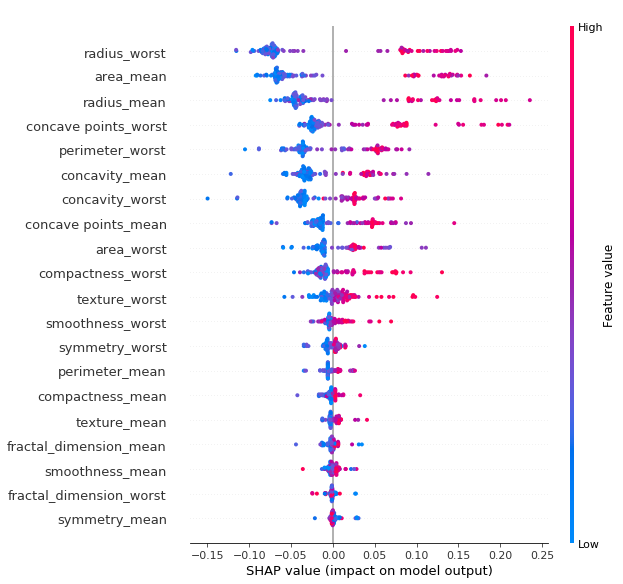

In [15]:
shap.summary_plot(shap_values[1],X_test,feature_names=feature_names)